# Project: Plant Seedlings Image Classification using CNNs in Keras

## Data Description:
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

## Dataset: 
The data file names are:
-  images.npy
- Label.csv

The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv. So that you can work on the data/project seamlessly without worrying about the high data volume.

Link to the Kaggle project site: https://www.kaggle.com/c/plant-seedlings-classification/data?select=train

## Context:
Can you differentiate a weed from a crop seedling?

The ability to do so effectively can mean better crop yields and better stewardship of the environment.

The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

## Labels (Plant species):
- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet 

# Step 1: Import Libraries & Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1a. Images Dataset:

In [2]:
# Load the Images data (Numpy array of Images)
data = np.load('/content/drive/My Drive/Colab Notebooks/ML-UOT/Project/Project 7/images.npy')

In [3]:
# Shape of images data
data.shape

(4750, 128, 128, 3)

> There are 4750 Images of size 128X128X3 (RGB).

In [4]:
# Check data type of dataset
type(data)

numpy.ndarray

> The data is a numpy array.

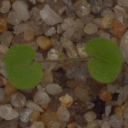

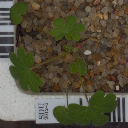

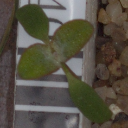

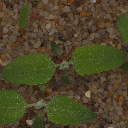

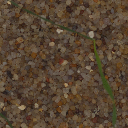

In [5]:
# Print sample images 
for i in [0,400,607,890,4000]:
  cv2_imshow(data[i])
  print(" ")

In [6]:
# Create a copy of images dataset 
X = data

In [7]:
X.shape

(4750, 128, 128, 3)

## 1b. Labels Dataset:

In [8]:
# Labels for images
label_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML-UOT/Project/Project 7/Labels.csv')

In [9]:
# shape of labels data
label_data.shape

(4750, 1)

In [10]:
# View labels data
label_data.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [11]:
# Check how many labels belong to each plant species
label_data.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

> The weeds include 'Common Chickweed' = 611 and 'Scentless Mayweed' = 516, which is total of 1127 out of 4750 images

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


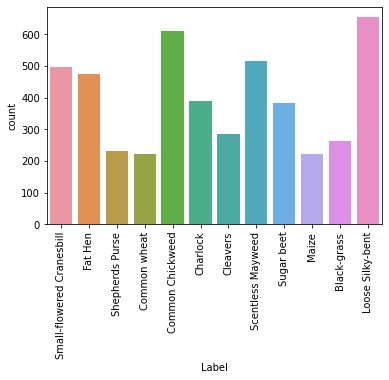

In [12]:
# Plot countplot for each plant species
sns.countplot(label_data['Label']);
plt.xticks(rotation = 90);

> There are maximum number of plants belonging to 'Loose-Silky-bent' species, while minimum number of plants belonging to 'Common wheat'. 

In [13]:
# Store values of labels in another variable
labels = label_data.values

In [14]:
# Check datatype of the variable that contains labels
type(labels)

numpy.ndarray

In [15]:
# Label Encoding of labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels.ravel()) # labels.ravel().shape = (4750,)

In [16]:
# Print the Encoded labels
print(labels)

[10 10 10 ...  6  6  6]


In [17]:
# One-hot encoding of labels
labels = pd.get_dummies(labels)

In [18]:
# Print one-hot encoded labels
print(labels)

      0   1   2   3   4   5   6   7   8   9   10  11
0      0   0   0   0   0   0   0   0   0   0   1   0
1      0   0   0   0   0   0   0   0   0   0   1   0
2      0   0   0   0   0   0   0   0   0   0   1   0
3      0   0   0   0   0   0   0   0   0   0   1   0
4      0   0   0   0   0   0   0   0   0   0   1   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
4745   0   0   0   0   0   0   1   0   0   0   0   0
4746   0   0   0   0   0   0   1   0   0   0   0   0
4747   0   0   0   0   0   0   1   0   0   0   0   0
4748   0   0   0   0   0   0   1   0   0   0   0   0
4749   0   0   0   0   0   0   1   0   0   0   0   0

[4750 rows x 12 columns]


In [19]:
# Classes encoded for labels
le.classes_

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

In [20]:
# Create a dictionary of labels
label_dict = {0: 'Black-grass', 1: 'Charlock', 2: 'Cleavers', 3: 'Common Chickweed',
       4: 'Common wheat', 5: 'Fat Hen', 6: 'Loose Silky-bent', 7: 'Maize',
       8: 'Scentless Mayweed', 9: 'Shepherds Purse',
       10: 'Small-flowered Cranesbill', 11: 'Sugar beet'}

In [21]:
# Create a target variable that contains one-hot encoded labels for images
Y = labels.values

In [22]:
# Shape of target variable
Y.shape

(4750, 12)

In [23]:
print(Y)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
Y.shape

(4750, 12)

# Step 2: Data Preprocessing

In [25]:
# Check missing values
print(np.isnan(X).any())
print(np.isnan(Y).any())

False
False


> There are no null values in X and Y.

In [26]:
# Normalize the X data
X = X.astype('float32')/ 255.0

In [27]:
# Shape of X data remains same after normalization
X.shape

(4750, 128, 128, 3)

In [28]:
# Gaussian Blurring with kernel of size 5X5
X_images = np.empty((4750,128,128,3))
for i in range(0,len(X)):
  X_images[i] = cv2.GaussianBlur(X[i], (5,5), 0)

In [29]:
# Shape of images dataset after Gaussian Blurring
X_images.shape

(4750, 128, 128, 3)

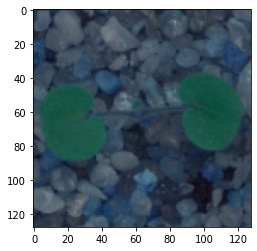

In [30]:
# print sample of original image
i = 0
img = data[i]
img = img.reshape((128,128,3))
plt.imshow(img)

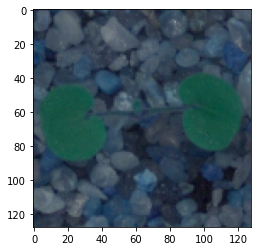

In [31]:
# print sample of image after normalization
i = 0
img = X[i]
img = img.reshape((128,128,3))
plt.imshow(img)

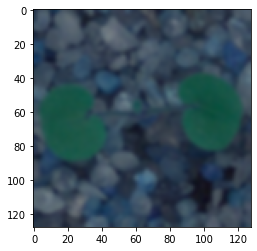

In [32]:
# print sample of image after Gaussian Blurring(Smoothing)
i = 0
img = X_images[i]
img = img.reshape((128,128,3))
plt.imshow(img)

In [33]:
Y.shape

(4750, 12)

In [34]:
# print label for this sample image
print(Y[0])
print(label_data.iloc[0])

[0 0 0 0 0 0 0 0 0 0 1 0]
Label    Small-flowered Cranesbill
Name: 0, dtype: object


# Step 3: Prepare the data

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Split train, test and validation data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
X_val, X_test, Y_val, Y_test = train_test_split(X_test,Y_test, test_size = 0.5, random_state = 0)

In [37]:
# check shapes of data
print("Training set X: {}, Y: {}".format(X_train.shape, Y_train.shape))
print("Validation set X: {}, Y: {}".format(X_val.shape, Y_val.shape))
print("Testing set X: {}, Y: {}".format(X_test.shape, Y_test.shape))

Training set X: (3325, 128, 128, 3), Y: (3325, 12)
Validation set X: (712, 128, 128, 3), Y: (712, 12)
Testing set X: (713, 128, 128, 3), Y: (713, 12)


# Step 4: Model Training & Evaluation

In [38]:
# Set the batch size, number of epochs, classes to classify
batch_size = 32
epochs = 80
num_classes = 12

In [39]:
# Shape of X and Y
print("X: {}".format(X.shape))
print("Y: {}".format(Y.shape))

X: (4750, 128, 128, 3)
Y: (4750, 12)


In [40]:
# Build CNN classifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, GlobalMaxPooling2D

model = Sequential()

# Add Convolutional layer with 32 filters of size 3X3 and 'relu' activation function
model.add(Conv2D(32, kernel_size= (3,3), activation = 'relu', input_shape = (128,128,3), padding = 'same'))
# Add MaxPooling layer of size 2X2
model.add(MaxPooling2D(pool_size= (2,2)))
# Add Batch Normalization layer
model.add(BatchNormalization())

# Add 2nd Convolutional layer with 64 filters of size 3X3 and 'relu' activation function
model.add(Conv2D(64, kernel_size= (3,3), activation = 'relu',padding = 'same'))
# Add 2nd MaxPooling layer of size 2X2
model.add(MaxPooling2D(pool_size= (2,2)))
# Add Batch Normalization layer
model.add(BatchNormalization())

# Add 3rd Convolutional layer with 128 filters of size 3X3 and 'relu' activation function
model.add(Conv2D(128, kernel_size= (3,3), activation = 'relu', padding = 'same'))
# Add 3rd MaxPooling layer of size 2X2
model.add(MaxPooling2D(pool_size= (2,2)))
# Add Batch Normalization layer
model.add(BatchNormalization())

# Add 3rd Convolutional layer with 256 filters of size 3X3 and 'relu' activation function
model.add(Conv2D(256, kernel_size= (3,3), activation = 'relu', padding = 'same'))
# Add 3rd MaxPooling layer of size 2X2
model.add(MaxPooling2D(pool_size= (2,2)))
# Add Batch Normalization layer
model.add(BatchNormalization())

# Add 3rd Convolutional layer with 1024 filters of size 3X3 and 'relu' activation function
model.add(Conv2D(1024, kernel_size= (3,3), activation = 'relu', padding = 'same'))
# Add 3rd MaxPooling layer of size 2X2
model.add(MaxPooling2D(pool_size= (2,2)))
# Add Batch Normalization layer
model.add(BatchNormalization())

# Add a Global MaxPooling layer 
model.add(GlobalMaxPooling2D())
# Add a Dense layer with 128 neurons and 'relu' activation function
model.add(Dense(128, activation = 'relu'))
# Add dropout layer
model.add(Dropout(0.2))
# Add 2nd Dense layer with 64 neurons and 'relu' activation function
model.add(Dense(64, activation = 'relu'))
# Add dropout layer
model.add(Dropout(0.2))

# Add output layer with 12 neurons and 'softmax' activation function
model.add(Dense(12, activation = 'softmax'))

In [41]:
# Compile the model
model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       7

In [43]:
# Fit the model
cnn1 = model.fit(X_train, Y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (X_val, Y_val))

Epoch 1/80
104/104 [==============================] - 6s 35ms/step - loss: 2.6022 - accuracy: 0.2715 - val_loss: 4.5507 - val_accuracy: 0.1348
Epoch 2/80
104/104 [==============================] - 3s 27ms/step - loss: 1.3690 - accuracy: 0.5465 - val_loss: 9.2192 - val_accuracy: 0.1348
Epoch 3/80
104/104 [==============================] - 3s 27ms/step - loss: 1.0048 - accuracy: 0.6682 - val_loss: 12.9764 - val_accuracy: 0.1348
Epoch 4/80
104/104 [==============================] - 3s 27ms/step - loss: 0.8685 - accuracy: 0.7067 - val_loss: 12.0108 - val_accuracy: 0.1348
Epoch 5/80
104/104 [==============================] - 3s 27ms/step - loss: 0.7062 - accuracy: 0.7664 - val_loss: 3.2931 - val_accuracy: 0.2360
Epoch 6/80
104/104 [==============================] - 3s 27ms/step - loss: 0.6103 - accuracy: 0.8006 - val_loss: 3.3929 - val_accuracy: 0.3764
Epoch 7/80
104/104 [==============================] - 3s 27ms/step - loss: 0.4814 - accuracy: 0.8355 - val_loss: 1.2241 - val_accuracy: 0.62

In [44]:
# Evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose = 1)
print('Test loss: {}'.format(scores[0]))
print('Test Accuracy: {}'.format(scores[1]))

23/23 [==============================] - 0s 16ms/step - loss: 0.5031 - accuracy: 0.9074
Test loss: 0.5031034350395203
Test Accuracy: 0.9074333906173706


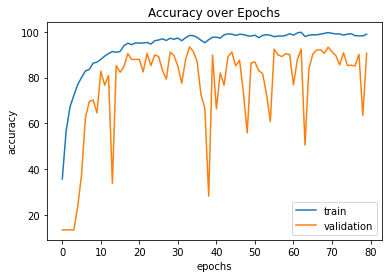

In [45]:
# Plot accuracy over epochs

plt.plot(np.array(cnn1.history['accuracy'])*100)
plt.plot(np.array(cnn1.history['val_accuracy']) *100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('Accuracy over Epochs')
plt.legend(['train','validation'])
plt.show()

In [46]:
Y_pred = model.predict(X_test)

In [47]:
for i in [2,3,33,36,59]:
  print("\nPredictions for")
  print("Y_test:", label_dict[np.argmax(Y_test[i])])
  print("Y_pred:", label_dict[np.argmax(Y_pred[i])])


Predictions for
Y_test: Shepherds Purse
Y_pred: Shepherds Purse

Predictions for
Y_test: Loose Silky-bent
Y_pred: Loose Silky-bent

Predictions for
Y_test: Scentless Mayweed
Y_pred: Scentless Mayweed

Predictions for
Y_test: Maize
Y_pred: Charlock

Predictions for
Y_test: Scentless Mayweed
Y_pred: Scentless Mayweed


In [48]:
Y_test_label = np.zeros(Y_test.shape[0])

In [49]:
for i in range(0,len(Y_test)):
  Y_test_label[i] = np.argmax(Y_test[i])

In [50]:
Y_test_label.shape

(713,)

In [51]:
Y_pred_label = np.zeros(Y_pred.shape[0])

In [52]:
for i in range(0,len(Y_test)):
  Y_pred_label[i] = np.argmax(Y_pred[i])

In [53]:
Y_pred_label.shape

(713,)

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test_label, Y_pred_label)
print(cm)

[[19  0  0  2  1  0 21  0  0  0  0  0]
 [ 0 58  0  0  0  0  0  0  0  1  0  0]
 [ 0  4 35  0  0  0  0  0  0  1  0  0]
 [ 0  0  0 89  0  0  0  0  1  2  0  0]
 [ 0  1  0  0 34  0  1  0  0  0  0  0]
 [ 1  0  0  0  2 59  0  0  0  0  0  0]
 [ 7  0  0  0  0  0 83  0  0  0  0  0]
 [ 0  2  0  1  2  0  1 30  0  0  0  2]
 [ 0  1  0  0  0  0  1  1 80  0  0  0]
 [ 0  0  0  0  0  0  0  0  2 22  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 83  0]
 [ 0  0  1  1  4  0  0  0  1  0  0 55]]


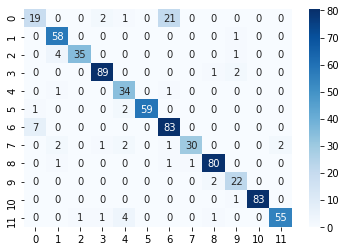

In [55]:
sns.heatmap(cm, cmap = 'Blues', robust = True, annot = True);

In [56]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_label, Y_pred_label))

              precision    recall  f1-score   support

         0.0       0.70      0.44      0.54        43
         1.0       0.88      0.98      0.93        59
         2.0       0.97      0.88      0.92        40
         3.0       0.96      0.97      0.96        92
         4.0       0.79      0.94      0.86        36
         5.0       1.00      0.95      0.98        62
         6.0       0.78      0.92      0.84        90
         7.0       0.97      0.79      0.87        38
         8.0       0.95      0.96      0.96        83
         9.0       0.81      0.92      0.86        24
        10.0       1.00      0.99      0.99        84
        11.0       0.96      0.89      0.92        62

    accuracy                           0.91       713
   macro avg       0.90      0.89      0.89       713
weighted avg       0.91      0.91      0.90       713



> The weeds are class label 3 and label 8, both have recall of 97% and 96% i.e. out of all positive predictions for weed, the predictions are correct at a higher rate. 

> <b> Hence, the goal of the project is satisfied as cnn model has high correct predictions for the weeds among all the plant species. Also, the overall accuracy is 91% which is good enough. </b>